interactive(children=(FloatSlider(value=1.0, description='age', max=99.0, min=1.0), FloatSlider(value=40.0, de…

<function __main__.demo(age, DBP, SBP)>

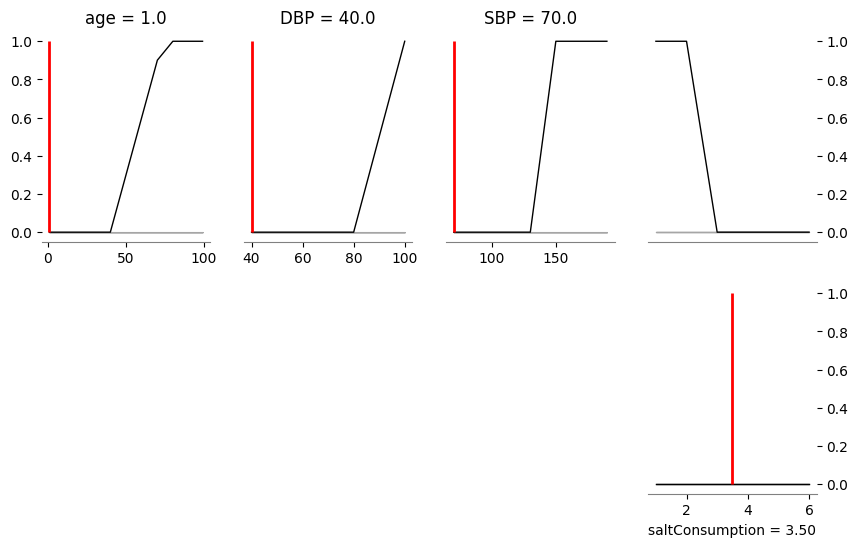

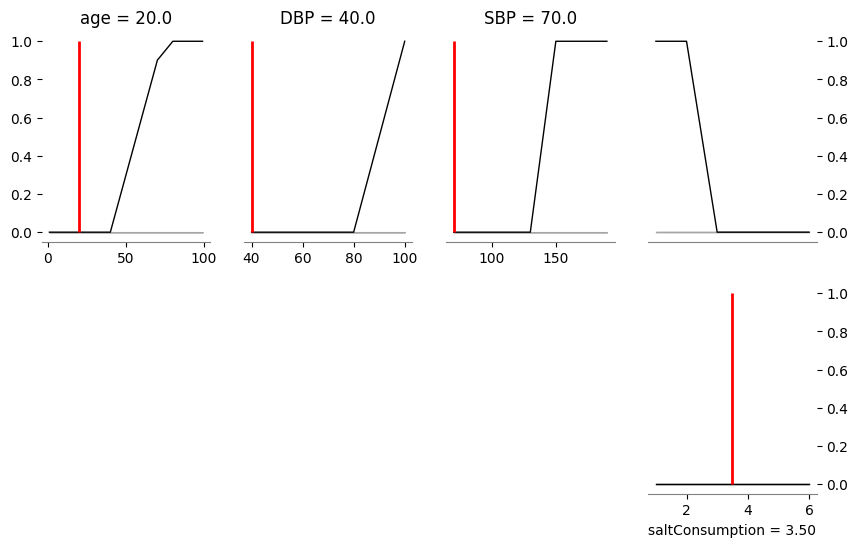

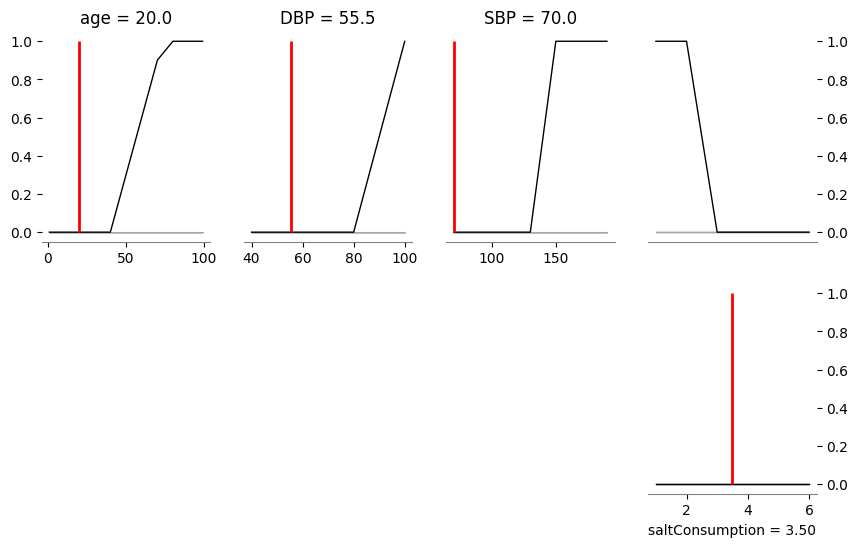

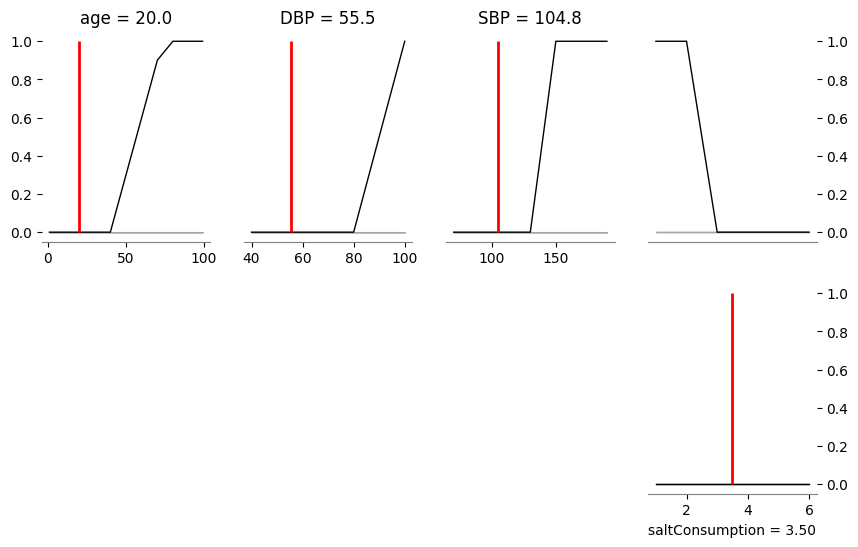

In [2]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference
from ipywidgets import interact, widgets

# Defining the variables of the problem
variables = {
    "age": FuzzyVariable(
        universe_range=(1, 99),
        terms={
            "Teen": [(1, 1), (5, 0.8), (10, 0.6), (15, 0.3), (20, 0)],
            "Young": [(10, 0), (15, 0.5), (20, 1), (25, 1), (30, 0.7), (35, 0.5), (40, 0.2), (45, 0)],
            "Old": [(40, 0), (50, 0.3), (60, 0.6), (70, 0.9), (80, 1)]
        }
    ),
    "DBP": FuzzyVariable(
        universe_range=(40, 100),
        terms={
            "Low_DBP": [(40, 1), (50, 0.5), (60, 0)],
            "Medium_DBP": [(50, 0), (60, 0.5), (70, 1), (80, 0.5), (90, 0)],
            "High_DBP": [(80, 0), (90, 0.5), (100, 1)]
        }
    ),
    "SBP": FuzzyVariable(
        universe_range=(70, 190),
        terms={
            "Low_SBP": [(70, 1), (80, 0.5), (90, 0)],
            "Medium_SBP": [(80, 0), (90, 0.5), (100, 1), (110, 1), (120, 0.5), (130, 0)],
            "High_SBP": [(130, 0), (140, 0.5), (150, 1)]
        }
    ),
    "saltConsumption": FuzzyVariable(
        universe_range=(1, 6),
        terms={
            "Low": [(2, 1), (2.5, 0.5), (3, 0)],
            "Medium": [(2, 0), (2.5, 0.5), (3, 1), (3.5, 1), (4, 0.5), (4.5, 0)],
            "High": [(3.5, 0), (4, 0.5), (4.5, 1)]
        }
    )
}

# Defining the fuzzy rules
rules = [
    FuzzyRule(
        premise=[
            ("age", "Old"),
            ("AND", "DBP", "High_DBP"),
            ("AND", "SBP", "High_SBP")
        ],
        consequence=[("saltConsumption", "Low")]
    ),
    # Additional rules go here
]

# Creating the fuzzy inference model
model = DecompositionalInference(and_operator="min", or_operator="max",
                                 implication_operator="Rc", composition_operator="max-min",
                                 production_link="max", defuzzification_operator="cog")

# Creating an interactive interface for the fuzzy system
def demo(age, DBP, SBP):
    plt.figure(figsize=(10, 6))
    model.plot(variables=variables, rules=rules, age=age, DBP=DBP, SBP=SBP)

interact(demo, age=widgets.FloatSlider(min=1, max=99),
         DBP=widgets.FloatSlider(min=40, max=100),
         SBP=widgets.FloatSlider(min=70, max=190))
